In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

### Getting data

Data Source : https://grouplens.org/datasets/movielens/100k/

In [3]:
col_name = ["user_id", "item_id", "rating", "timestamp"] #According to data instruction, we've following column name
df = pd.read_csv("ml-100k/u.data", sep = "\t", names = col_name)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
df.shape # 4 attributes & 100k tupples

(100000, 4)

##### Finding number of users & movies in the dataset

In [6]:
users = df["user_id"].nunique()
movies = df["item_id"].nunique()

print("Total users : ", users)
print("Total movies : ", movies)

Total users :  943
Total movies :  1682


#### finding movie name using u.item dataset

In [7]:
items = pd.read_csv("ml-100k/u.item", sep = "\|", header = None, encoding = "ISO-8859-1")
items.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


##### For movies name we just need 1st & 2nd column name

In [8]:
movie_title = items[[0, 1]]
movie_title.columns = ["item_id", "movie_name"]
print(movie_title.head())

print(movie_title.shape)

   item_id         movie_name
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)
(1682, 2)


#### So total movies = total movies_title according to both dataset => we can merge them into one

In [9]:
df = pd.merge(df, movie_title, on = "item_id")
df.head()

,user_id,item_id,rating,timestamp,movie_name
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


##### Diff. users given different rating to movies, so takes group up all same movies together & find mean rating

In [10]:
data = df.groupby("movie_name").mean()
data.head()

,user_id,item_id,rating,timestamp
movie_name,,,,
'Til There Was You (1997),383.777778,1300.0,2.333333,8.861152e+08
1-900 (1994),477.000000,1353.0,2.600000,8.797260e+08
101 Dalmatians (1996),450.330275,225.0,2.908257,8.829281e+08
12 Angry Men (1957),453.552000,178.0,4.344000,8.828963e+08
187 (1997),517.097561,330.0,3.024390,8.850084e+08


##### extracting the rating column & sorting movies acc. to rating given

In [11]:
rating = pd.DataFrame(data["rating"])
rating.head()

,rating
movie_name,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


##### It's possible we've 5* movies that rating by very few single person => Less gurantee of goodness 

In [12]:
data2 = df.groupby("movie_name").count()
data2.head()

,user_id,item_id,rating,timestamp
movie_name,,,,
'Til There Was You (1997),9,9,9,9
1-900 (1994),5,5,5,5
101 Dalmatians (1996),109,109,109,109
12 Angry Men (1957),125,125,125,125
187 (1997),41,41,41,41


In [13]:
data2["rating"].sort_values(ascending = False)

movie_name
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

##### Takes no. of rating in rating data frame

In [14]:
rating["No. of ratings"] = pd.DataFrame(data2["rating"])
rating.head()

,rating,No. of ratings
movie_name,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [15]:
rating = rating.sort_values(by = "No. of ratings", ascending = False)

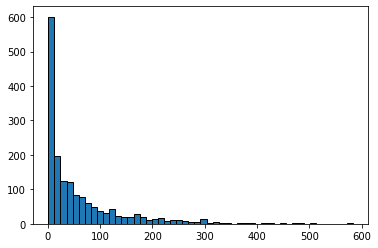

In [16]:
plt.hist(rating["No. of ratings"], bins = 50, edgecolor = "black")
plt.show()

##### There are lots of movies that are rating by very few peoples => we can drop those tuples

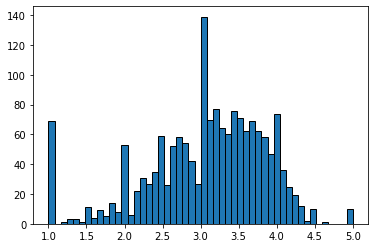

In [17]:
plt.hist(rating["rating"], bins = 50, edgecolor = "black")
plt.show()

##### Acc to above histogram we can say very few peoples rated 5* & 1* to movies.  And  It looks like Normal distrubution

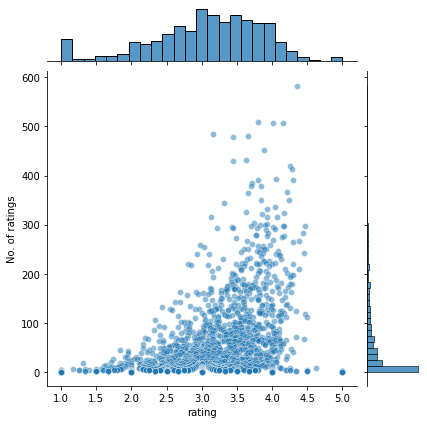

In [19]:
sns.jointplot(x = "rating", y = "No. of ratings", data = rating, alpha = 0.5)

##### As we said 1* & 5* rated less is seen from above & this graph looks like linear rating is increasing as more peoples rating it

In [20]:
#### Movie Matrix pivot table shows the data of all users watched which-which movies

In [21]:
movie_matrix = df.pivot_table(index = "user_id", columns = "movie_name", values = "rating")

In [22]:
movie_matrix.head()

movie_name,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


#### Our prediction function works on correlation b/w movies watch by different users & rating given by them

In [23]:
def predict_movies(movie_name) :
    movie_user_ratings = movie_matrix[movie_name]
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)
    
    corr_movie = pd.DataFrame(similar_to_movie, columns = ["Correlation"])
    corr_movie.dropna(inplace = True)
    
    corr_movie = corr_movie.join(rating["No. of ratings"])
    prediction = corr_movie[corr_movie["No. of ratings"] > 100].sort_values("Correlation", ascending = False)
    
    return prediction

In [24]:
rating.head()

,rating,No. of ratings
movie_name,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


##### Testing our model by passing it movie name & it return movies that is similar to it

In [25]:
pred = predict_movies("Star Wars (1977)")
pred.head()

,Correlation,No. of ratings
movie_name,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
